In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Z-index

$$ \text{z_index} = \frac {v-u} {s} $$

    where v --> value , u --> mean and s --> std
       
    if z_index >1 (or 3 or depend on data) then that value is ourlier

In [39]:
d1 = np.random.randint(10,50,40)
d2 = np.random.randint(200,250,10)

d = np.concatenate((d1,d2))
np.random.shuffle(d)
d = d.reshape(10,5)

In [40]:
d

array([[ 47,  28, 248,  10,  17],
       [ 18, 221,  46, 236,  42],
       [ 19,  21,  47, 231,  34],
       [ 11,  31,  25,  49, 235],
       [ 13,  38,  47,  49,  32],
       [ 15,  36,  25,  45,  16],
       [224, 205,  15, 246,  24],
       [ 12,  38,  39,  18,  16],
       [ 47,  37,  24,  11, 236],
       [207,  32,  20,  38,  28]])

In [41]:
df = pd.DataFrame(d,columns=list("ABCDE"))

In [42]:
df

,A,B,C,D,E
0,47,28,248,10,17
1,18,221,46,236,42
2,19,21,47,231,34
3,11,31,25,49,235
4,13,38,47,49,32
5,15,36,25,45,16
6,224,205,15,246,24
7,12,38,39,18,16
8,47,37,24,11,236
9,207,32,20,38,28


In [43]:
df['A']

0     47
1     18
2     19
3     11
4     13
5     15
6    224
7     12
8     47
9    207
Name: A, dtype: int32

In [24]:
m = df['A'].mean()
s = df['A'].std()

In [25]:
m

53.4

In [26]:
s

65.08660896579777

In [27]:
z = (df.loc[0,'A'] - m)/s

In [28]:
z

-0.20587952288375538

In [29]:
z = (df.loc[7,'A'] - m)/s

In [30]:
z

2.790128459379849

In [36]:
df

,A,B,C,D,E
0,215,15,33,18,36
1,202,29,34,26,35
2,235,27,17,241,27
3,26,231,45,241,201
4,244,18,43,40,38
5,19,34,45,42,23
6,46,21,45,49,27
7,34,16,17,35,35
8,29,219,25,32,209
9,35,27,30,10,28


In [44]:
d = {}  #in this dictionary the keys will be column and values will be the list of outliers
for i in df:
    m = df[i].mean()
    s = df[i].std()
    l = []
    for j in df[i]:
        z = (j - m)/s
        if z>1:
            l.append(j)
    d[i] = l
print(d)

{'A': [224, 207], 'B': [221, 205], 'C': [248], 'D': [236, 231, 246], 'E': [235, 236]}


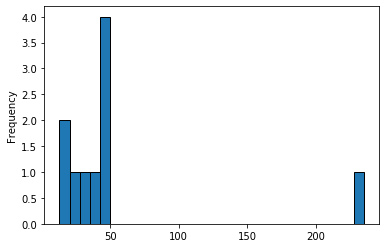

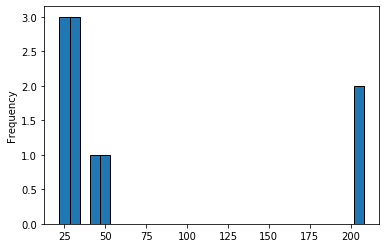

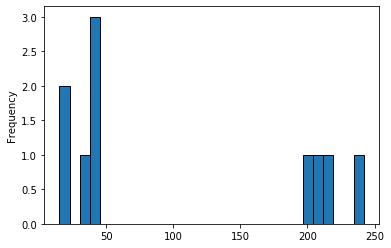

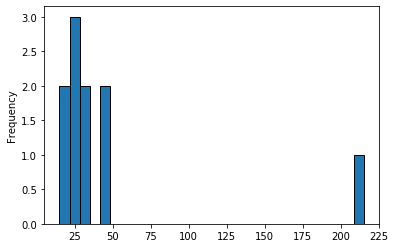

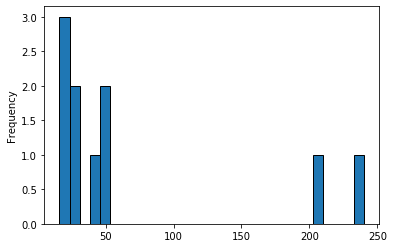

In [33]:
for i in df:
    df[i].plot(kind="hist",ec='k',bins=30)
    plt.show()

In [45]:
def get_outliers(df):
    d = {}  #in this dictionary the keys will be column and values will be the list of outliers
    for i in df:
        m = df[i].mean()
        s = df[i].std()
        l = []
        for j in df[i]:
            z = (j - m)/s
            if z>1.1:
                l.append(j)
        d[i] = l
    return d

def remove_outliers(df):
    d = get_outliers(df)
    for i in df:  #i --> columns
        out = d[i]
        for j in out:  # j --> outliers
            for k in df.index:  #k --> row labels --> so that we can use it in loc
                if df.loc[k,i] == j:
                    df.loc[k,i] = np.nan
    df.fillna(round(df.mean(),2),inplace=True)
get_outliers(df)

{'A': [224, 207],
 'B': [221, 205],
 'C': [248],
 'D': [236, 231, 246],
 'E': [235, 236]}

In [46]:
remove_outliers(df)

In [47]:
df

,A,B,C,D,E
0,47.00,28.00,32.0,10.00,17.00
1,18.00,32.62,46.0,31.43,42.00
2,19.00,21.00,47.0,31.43,34.00
3,11.00,31.00,25.0,49.00,26.12
4,13.00,38.00,47.0,49.00,32.00
5,15.00,36.00,25.0,45.00,16.00
6,22.75,32.62,15.0,31.43,24.00
7,12.00,38.00,39.0,18.00,16.00
8,47.00,37.00,24.0,11.00,26.12
9,22.75,32.00,20.0,38.00,28.00


In [47]:
np.round(df.mean(),2)

A    31.50
B    26.17
C    32.33
D    22.86
E    24.83
dtype: float64

In [45]:
df.mean()

A    31.500000
B    26.166667
C    32.333333
D    22.857143
E    24.833333
dtype: float64

In [41]:
d

{'A': [235],
 'B': [208, 203],
 'C': [203, 211, 242, 212],
 'D': [215],
 'E': [240, 207]}

In [38]:
df[df['A'] == 235]['A'] = np.nan

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
df

,A,B,C,D,E
0,40.0,26.0,35.0,30.0,41.0
1,13.0,29.0,NaN,45.0,16.0
2,47.0,48.0,39.0,29.0,NaN
3,29.0,NaN,43.0,23.0,25.0
4,16.0,22.0,15.0,43.0,23.0
5,44.0,22.0,NaN,16.0,NaN
6,46.0,29.0,22.0,15.0,48.0
7,NaN,NaN,NaN,24.0,46.0
8,43.0,29.0,NaN,23.0,27.0
9,21.0,46.0,40.0,NaN,17.0


In [8]:
plt.rcParams['figure.figsize'] = 11,5

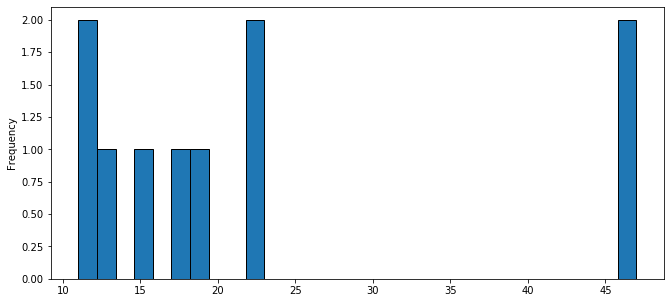

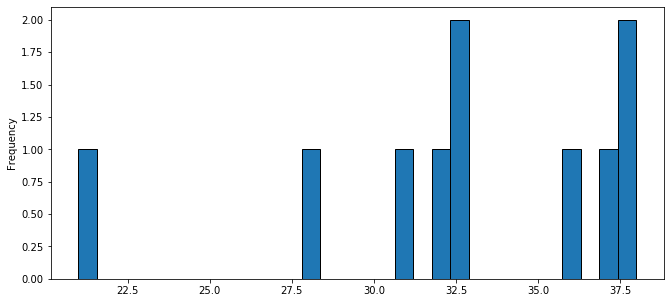

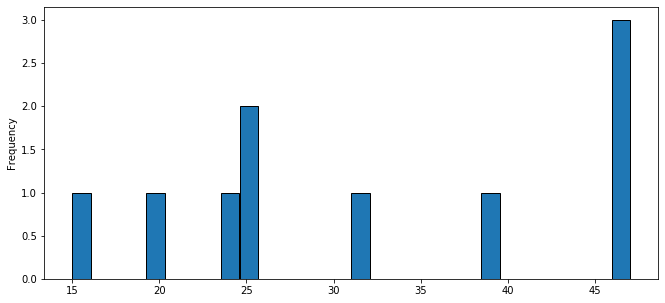

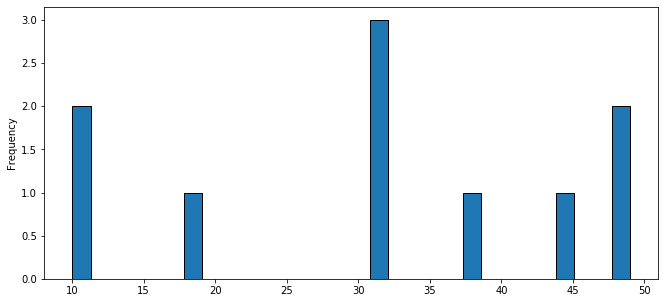

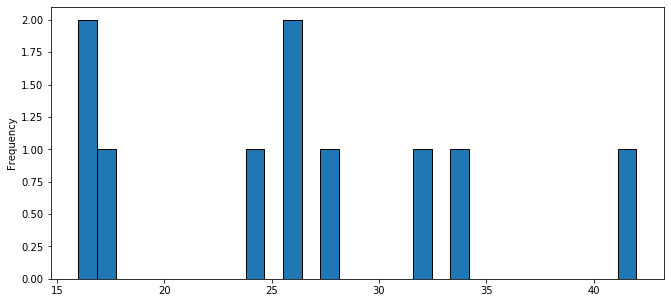

In [48]:
for i in df:
    df[i].plot(kind="hist",ec="k",bins=30)
    plt.show()

### InterQuartile Range


    q1 --> quartile1
    q3 --> quartile3
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    The values belor lower_bound and above upper_bound are outlier

In [49]:
d1 = np.random.randint(10,50,40)
d2 = np.random.randint(200,250,10)

d = np.concatenate((d1,d2))
np.random.shuffle(d)
d = d.reshape(10,5)

df2 = pd.DataFrame(d,columns=list("ABCDE"))

In [50]:
df2

,A,B,C,D,E
0,44,38,11,10,20
1,10,17,46,24,247
2,29,16,45,232,213
3,45,22,228,23,37
4,42,41,46,31,21
5,38,14,17,249,232
6,45,17,49,210,31
7,23,210,11,44,24
8,13,247,242,15,26
9,31,14,44,44,34


In [57]:
df2.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,32.000000,63.600000,73.900000,88.200000,88.500000
std,13.140269,87.872635,86.320398,99.104658,98.577944
min,10.000000,14.000000,11.000000,10.000000,20.000000
25%,24.500000,16.250000,23.750000,23.250000,24.500000
50%,34.500000,19.500000,45.500000,37.500000,32.500000
75%,43.500000,40.250000,48.250000,168.500000,169.000000
max,45.000000,247.000000,242.000000,249.000000,247.000000


In [58]:
ds = df2.describe()

In [55]:
ds.loc['25%','A']

13.5

In [59]:
out = {}
for i in df2:
    q1 = ds.loc['25%',i]
    q3 = ds.loc['75%',i]
    iqr = q3 - q1
    lb = q1 - (iqr*1.5)
    ub = q3 + (iqr*1.5)
    l = []
    for j in df2[i]:
        if j>ub or j<lb:
            l.append(j)
    out[i] = l
print(out)

{'A': [], 'B': [210, 247], 'C': [228, 242], 'D': [], 'E': []}


In [60]:
df2

,A,B,C,D,E
0,44,38,11,10,20
1,10,17,46,24,247
2,29,16,45,232,213
3,45,22,228,23,37
4,42,41,46,31,21
5,38,14,17,249,232
6,45,17,49,210,31
7,23,210,11,44,24
8,13,247,242,15,26
9,31,14,44,44,34


In [62]:
df2['D']

0     10
1     24
2    232
3     23
4     31
5    249
6    210
7     44
8     15
9     44
Name: D, dtype: int32

In [63]:
ds

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,32.000000,63.600000,73.900000,88.200000,88.500000
std,13.140269,87.872635,86.320398,99.104658,98.577944
min,10.000000,14.000000,11.000000,10.000000,20.000000
25%,24.500000,16.250000,23.750000,23.250000,24.500000
50%,34.500000,19.500000,45.500000,37.500000,32.500000
75%,43.500000,40.250000,48.250000,168.500000,169.000000
max,45.000000,247.000000,242.000000,249.000000,247.000000


In [64]:
##sql queries

In [65]:
sns.get_dataset_names()

C:\Anaconda\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Anaconda\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [68]:
data = sns.load_dataset("exercise",index_col=0)

In [69]:
data.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [70]:
import sqlalchemy

In [73]:
engine = sqlalchemy.create_engine("mysql://root@localhost:3306/batch7pm")

In [74]:
engine

Engine(mysql://root@localhost:3306/batch7pm)

In [75]:
data.to_json()

'{"id":{"0":1,"1":1,"2":1,"3":2,"4":2,"5":2,"6":3,"7":3,"8":3,"9":4,"10":4,"11":4,"12":5,"13":5,"14":5,"15":6,"16":6,"17":6,"18":7,"19":7,"20":7,"21":8,"22":8,"23":8,"24":9,"25":9,"26":9,"27":10,"28":10,"29":10,"30":11,"31":11,"32":11,"33":12,"34":12,"35":12,"36":13,"37":13,"38":13,"39":14,"40":14,"41":14,"42":15,"43":15,"44":15,"45":16,"46":16,"47":16,"48":17,"49":17,"50":17,"51":18,"52":18,"53":18,"54":19,"55":19,"56":19,"57":20,"58":20,"59":20,"60":21,"61":21,"62":21,"63":22,"64":22,"65":22,"66":23,"67":23,"68":23,"69":24,"70":24,"71":24,"72":25,"73":25,"74":25,"75":26,"76":26,"77":26,"78":27,"79":27,"80":27,"81":28,"82":28,"83":28,"84":29,"85":29,"86":29,"87":30,"88":30,"89":30},"diet":{"0":"low fat","1":"low fat","2":"low fat","3":"low fat","4":"low fat","5":"low fat","6":"low fat","7":"low fat","8":"low fat","9":"low fat","10":"low fat","11":"low fat","12":"low fat","13":"low fat","14":"low fat","15":"no fat","16":"no fat","17":"no fat","18":"no fat","19":"no fat","20":"no fat","

In [76]:
data.to_dict()

{'id': {0: 1,
  1: 1,
  2: 1,
  3: 2,
  4: 2,
  5: 2,
  6: 3,
  7: 3,
  8: 3,
  9: 4,
  10: 4,
  11: 4,
  12: 5,
  13: 5,
  14: 5,
  15: 6,
  16: 6,
  17: 6,
  18: 7,
  19: 7,
  20: 7,
  21: 8,
  22: 8,
  23: 8,
  24: 9,
  25: 9,
  26: 9,
  27: 10,
  28: 10,
  29: 10,
  30: 11,
  31: 11,
  32: 11,
  33: 12,
  34: 12,
  35: 12,
  36: 13,
  37: 13,
  38: 13,
  39: 14,
  40: 14,
  41: 14,
  42: 15,
  43: 15,
  44: 15,
  45: 16,
  46: 16,
  47: 16,
  48: 17,
  49: 17,
  50: 17,
  51: 18,
  52: 18,
  53: 18,
  54: 19,
  55: 19,
  56: 19,
  57: 20,
  58: 20,
  59: 20,
  60: 21,
  61: 21,
  62: 21,
  63: 22,
  64: 22,
  65: 22,
  66: 23,
  67: 23,
  68: 23,
  69: 24,
  70: 24,
  71: 24,
  72: 25,
  73: 25,
  74: 25,
  75: 26,
  76: 26,
  77: 26,
  78: 27,
  79: 27,
  80: 27,
  81: 28,
  82: 28,
  83: 28,
  84: 29,
  85: 29,
  86: 29,
  87: 30,
  88: 30,
  89: 30},
 'diet': {0: 'low fat',
  1: 'low fat',
  2: 'low fat',
  3: 'low fat',
  4: 'low fat',
  5: 'low fat',
  6: 'low fat',
  7: 'low 

In [78]:
data.to_csv("exercise.csv")

In [81]:
data.to_latex()

'\\begin{tabular}{lrlrll}\n\\toprule\n{} &  id &     diet &  pulse &    time &     kind \\\\\n\\midrule\n0  &   1 &  low fat &     85 &   1 min &     rest \\\\\n1  &   1 &  low fat &     85 &  15 min &     rest \\\\\n2  &   1 &  low fat &     88 &  30 min &     rest \\\\\n3  &   2 &  low fat &     90 &   1 min &     rest \\\\\n4  &   2 &  low fat &     92 &  15 min &     rest \\\\\n5  &   2 &  low fat &     93 &  30 min &     rest \\\\\n6  &   3 &  low fat &     97 &   1 min &     rest \\\\\n7  &   3 &  low fat &     97 &  15 min &     rest \\\\\n8  &   3 &  low fat &     94 &  30 min &     rest \\\\\n9  &   4 &  low fat &     80 &   1 min &     rest \\\\\n10 &   4 &  low fat &     82 &  15 min &     rest \\\\\n11 &   4 &  low fat &     83 &  30 min &     rest \\\\\n12 &   5 &  low fat &     91 &   1 min &     rest \\\\\n13 &   5 &  low fat &     92 &  15 min &     rest \\\\\n14 &   5 &  low fat &     91 &  30 min &     rest \\\\\n15 &   6 &   no fat &     83 &   1 min &     rest \\\\\

In [82]:
data.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>id</th>\n      <th>diet</th>\n      <th>pulse</th>\n      <th>time</th>\n      <th>kind</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>1</td>\n      <td>low fat</td>\n      <td>85</td>\n      <td>1 min</td>\n      <td>rest</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>1</td>\n      <td>low fat</td>\n      <td>85</td>\n      <td>15 min</td>\n      <td>rest</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>1</td>\n      <td>low fat</td>\n      <td>88</td>\n      <td>30 min</td>\n      <td>rest</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>2</td>\n      <td>low fat</td>\n      <td>90</td>\n      <td>1 min</td>\n      <td>rest</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>2</td>\n      <td>low fat</td>\n      <td>92</td>\n      <td>15 min</td>\n      <td>rest</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>2<

In [84]:
conn = engine.connect()
data.to_sql("exercise",conn)

In [85]:
data.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [88]:
pd.read_sql_table("users_adduser",conn)

,firstname,lastname,email,password,pic
0,navneet,sharma,navneet@gmail.com,pass,one.jpg
1,Ramlal,Gupta,ram@gmail.com,admin,Download-black-and-white-wallpapers.jpg
2,ramsham,sham,sham@gmail.com,admin,one.jpg
3,Simran,Grover,simrangrover5@gmail.com,admin,4k-wallpaper-blur-close-up-1266821.jpg
4,Tarun,Singh,tarun@gmail.com,,


In [89]:
d = pd.read_sql_table("users_adduser",conn)

In [90]:
d

,firstname,lastname,email,password,pic
0,navneet,sharma,navneet@gmail.com,pass,one.jpg
1,Ramlal,Gupta,ram@gmail.com,admin,Download-black-and-white-wallpapers.jpg
2,ramsham,sham,sham@gmail.com,admin,one.jpg
3,Simran,Grover,simrangrover5@gmail.com,admin,4k-wallpaper-blur-close-up-1266821.jpg
4,Tarun,Singh,tarun@gmail.com,,


In [92]:
d[d['password'] == "admin"]

,firstname,lastname,email,password,pic
1,Ramlal,Gupta,ram@gmail.com,admin,Download-black-and-white-wallpapers.jpg
2,ramsham,sham,sham@gmail.com,admin,one.jpg
3,Simran,Grover,simrangrover5@gmail.com,admin,4k-wallpaper-blur-close-up-1266821.jpg


In [96]:
pd.read_sql_query("select * from exercise where kind='rest'",conn)['diet'].value_counts()

no fat     15
low fat    15
Name: diet, dtype: int64

In [94]:
type(pd.read_sql_query("select * from exercise",conn))

pandas.core.frame.DataFrame

In [97]:
data.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [98]:
data['time'].value_counts()

30 min    30
15 min    30
1 min     30
Name: time, dtype: int64

In [101]:
pd.read_sql_query("select avg(pulse) from exercise where time='1 min';",conn)

,avg(pulse)
0,93.1333


In [102]:
tips = sns.load_dataset("tips")

In [103]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


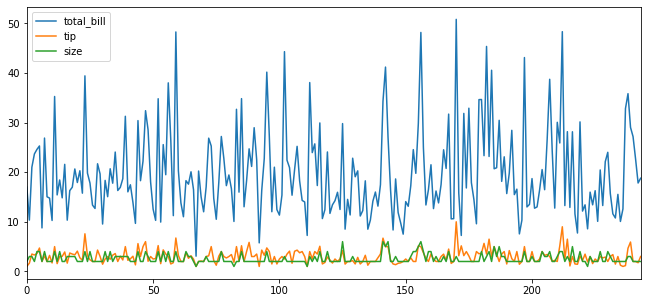

In [104]:
tips.plot()

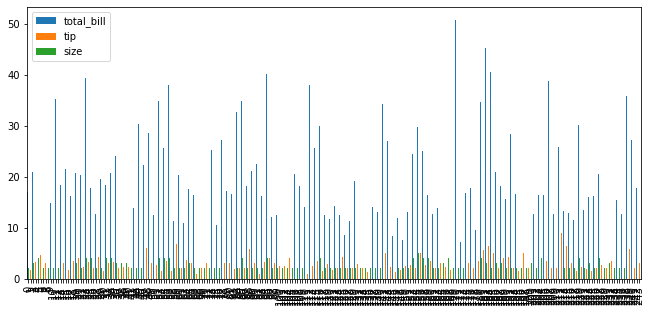

In [105]:
tips.plot(kind="bar")

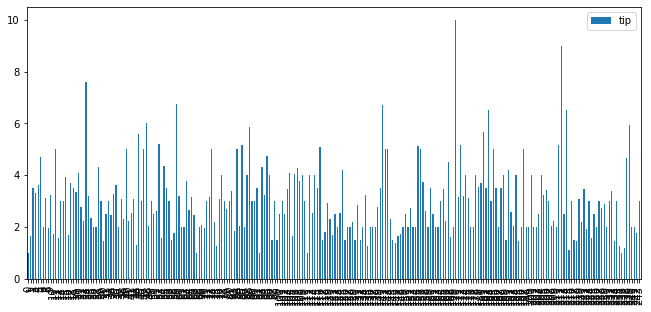

In [106]:
tips[['tip']].plot.bar()

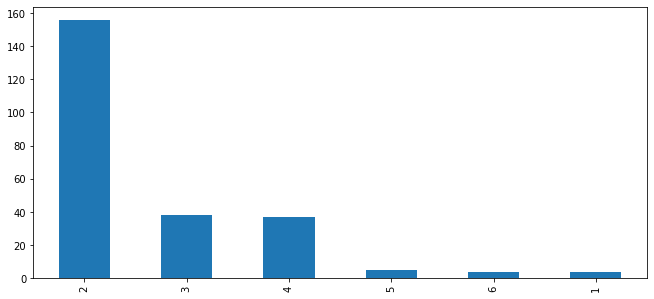

In [108]:
tips['size'].value_counts().plot.bar()

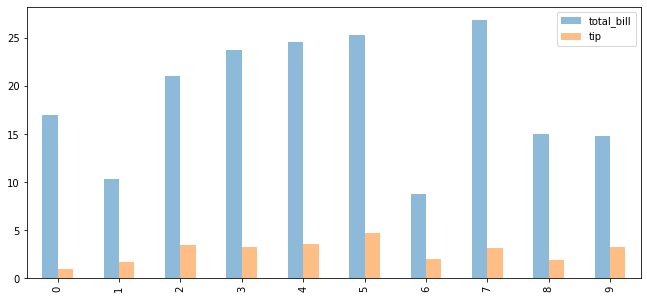

In [110]:
tips[['total_bill','tip']][:10].plot.bar(alpha=0.5)

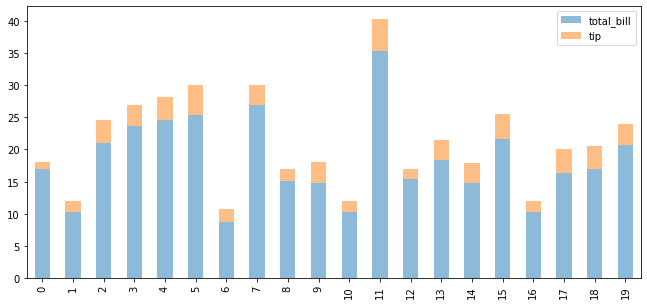

In [112]:
tips[['total_bill','tip']][:20].plot.bar(alpha=0.5,stacked=True)

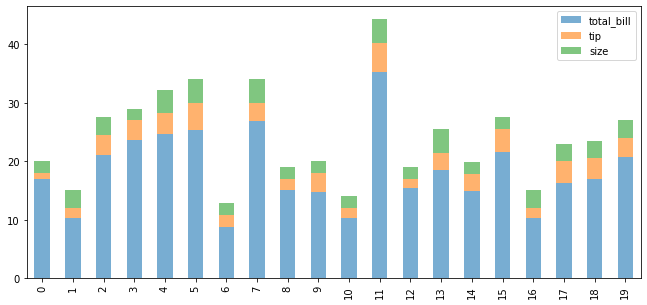

In [114]:
tips[['total_bill','tip','size']][:20].plot.bar(stacked=True,alpha=0.6)

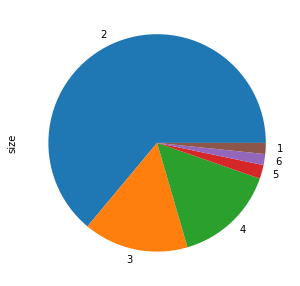

In [116]:
tips['size'].value_counts().plot.pie()

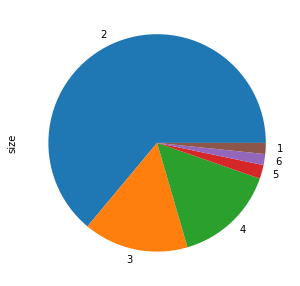

In [119]:
tips['size'].value_counts().plot.pie()

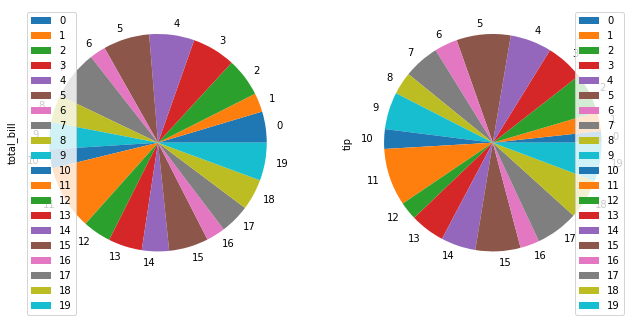

In [123]:
tips[['total_bill','tip']][:20].plot.pie(subplots=True)
plt.show()

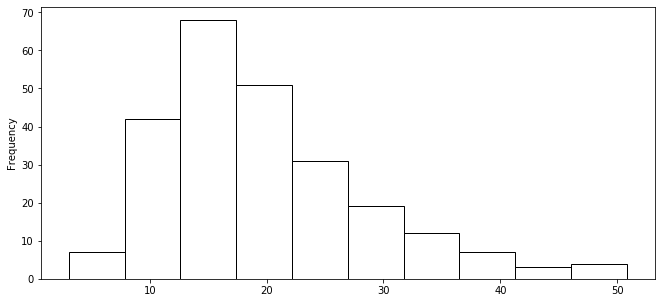

In [125]:
tips['total_bill'].plot.hist(color="white",ec="k")

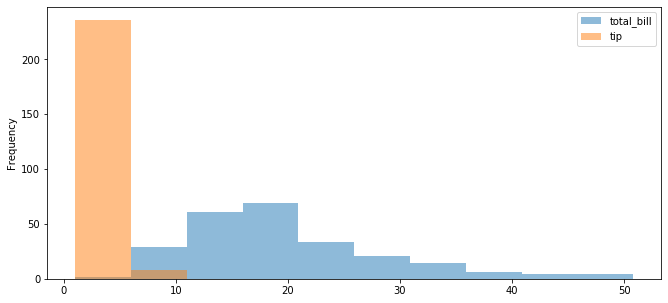

In [128]:
tips[['total_bill','tip']].plot.hist(alpha=0.5)

In [129]:
temp = pd.DataFrame(np.random.randn(3000).reshape(1000,3))

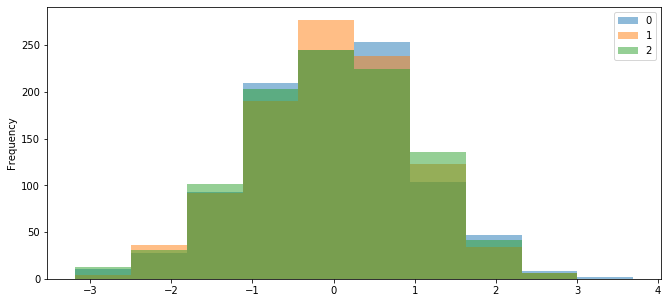

In [131]:
temp.plot.hist(alpha=0.5)
plt.show()

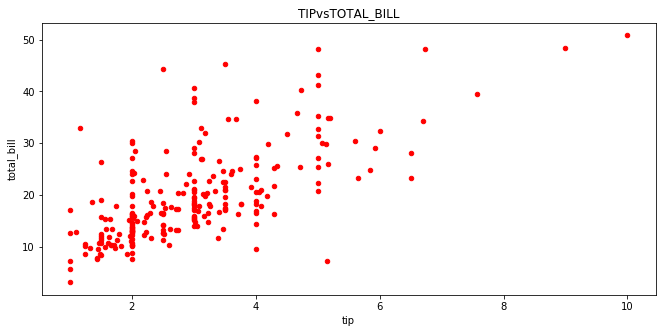

In [136]:
tips.plot.scatter(x='tip',y='total_bill',color="red",title="TIPvsTOTAL_BILL")
plt.show()

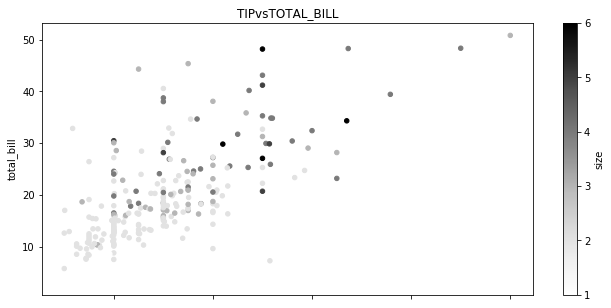

In [138]:
tips.plot.scatter(x='tip',y='total_bill',c="size",title="TIPvsTOTAL_BILL")
plt.show()

In [140]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [141]:
c = tips['smoker'].map({'No':0,"Yes":1})

In [147]:
c

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    1
241    1
242    0
243    0
Name: smoker, Length: 244, dtype: category
Categories (2, int64): [1, 0]

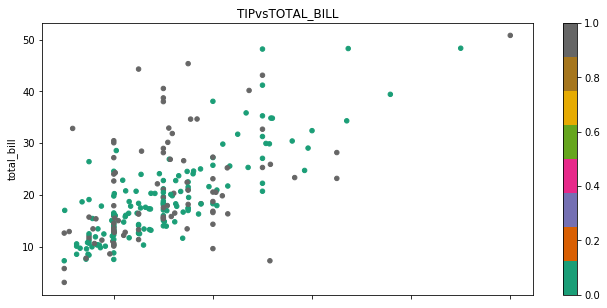

In [146]:
tips.plot.scatter(x='tip',y='total_bill',c=c,title="TIPvsTOTAL_BILL",cmap="Dark2")
plt.show()